Data Cleaning(Pandas/Numpy)

In [32]:
import pandas as pd
import numpy as np
data = pd.read_csv('customer_data.csv')

Remove duplicates

In [33]:
duplicate_data = data.duplicated().sum()
print(duplicate_data)

0


In [34]:
duplicate_remove = data.drop_duplicates()
print(duplicate_remove)

    customer_id            full_name  age  annual_income  spending_score  \
0          1001         Emily Martin   45          95726              73   
1          1002   Patricia Hernandez   22          40492              72   
2          1003       Michael Miller   38          36102              78   
3          1004  Elizabeth Hernandez   39          80336              31   
4          1005      Sophia Williams   51         115314              76   
..          ...                  ...  ...            ...             ...   
95         1096       William Thomas   43          75543              64   
96         1097       John Rodriguez   48          86556              22   
97         1098          Alex Thomas   50          33343              32   
98         1099         Jenny Martin   54          43500              98   
99         1100        Craig Jackson   52          83222              39   

    num_transactions  last_purchase_days         city  
0                 21           

Handle missing 

In [35]:
missing_value = data.isnull().sum()
print(missing_value)

customer_id           0
full_name             0
age                   0
annual_income         0
spending_score        0
num_transactions      0
last_purchase_days    0
city                  0
dtype: int64


Extract First name

In [36]:
data['first_name'] = data['full_name'].str.split().str[0]
print(data['first_name'])

0         Emily
1      Patricia
2       Michael
3     Elizabeth
4        Sophia
        ...    
95      William
96         John
97         Alex
98        Jenny
99        Craig
Name: first_name, Length: 100, dtype: object


City names to uppercase

In [37]:
data['city']= data['city'].str.upper()
print(data['city'])

0           MIAMI
1         PHOENIX
2         CHICAGO
3         CHICAGO
4         CHICAGO
         ...     
95       NEW YORK
96    LOS ANGELES
97          MIAMI
98    LOS ANGELES
99    LOS ANGELES
Name: city, Length: 100, dtype: object


In [38]:
data.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia


 Exploratory Data Analysis (EDA & Statistics)

In [39]:
column = ['age', 'annual_income', 'spending_score']
cols = {}

for i in column:
    cols[i] = {
        'Mean': data[i].mean(),
        'Median': data[i].median(),
        'Mode': data[i].mode()[0],
        'Variance': data[i].var(),
        'Standard Deviation': data[i].std()
    }

print(pd.DataFrame(cols))

                           age  annual_income  spending_score
Mean                 42.660000   7.607689e+04       54.780000
Median               44.500000   8.031800e+04       52.000000
Mode                 52.000000   3.115000e+04       78.000000
Variance            140.751919   7.754951e+08      699.809697
Standard Deviation   11.863891   2.784771e+04       26.453916


Plot the distribution of annual_income and spending_score

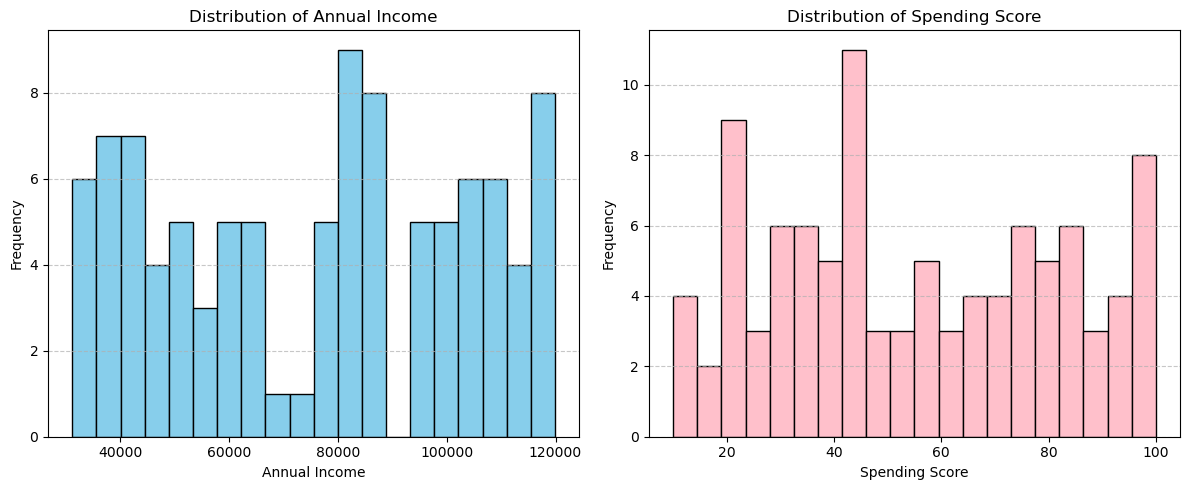

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['annual_income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.hist(data['spending_score'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [41]:
highest_city_average = data.groupby('city')['spending_score']
highest_city_average = highest_city_average.mean()
highest_city_average = highest_city_average.idxmax()
print(f"Highest Average Spending Score City -  {highest_city_average}")

Highest Average Spending Score City -  HOUSTON


Probability

In [42]:
Spending_score_above_70 = data[data['spending_score'] > 70]
probability_above_70 = len(Spending_score_above_70) / len(data)
print(f"Probability of spending score above 70 - {probability_above_70:.2f}")

Probability of spending score above 70 - 0.35


In [43]:
new_york = data[data['city'] == 'NEW YORK']
customers_in_ny = new_york[new_york['annual_income'] > 60000]
conditional_probability = len(customers_in_ny) / len(new_york)
print(f"Conditional probability of annual income above 60,000 for customers from NEW YORK: {conditional_probability:.2f}")

Conditional probability of annual income above 60,000 for customers from NEW YORK: 0.90


Linear Algebra

In [44]:
data1 = data.to_numpy()

In [45]:
age_vector = data['age']
income_vector = data['annual_income']

In [46]:
dot_product = np.dot(age_vector,income_vector)
print(dot_product)

320139613


In [47]:
magnitude=np.linalg.norm(income_vector)
print(f"{magnitude:.2f}")

809656.31


In [48]:
normalize_annual_income=income_vector/magnitude
print(normalize_annual_income)

0     0.118230
1     0.050011
2     0.044589
3     0.099222
4     0.142423
        ...   
95    0.093303
96    0.106905
97    0.041182
98    0.053727
99    0.102787
Name: annual_income, Length: 100, dtype: float64


Calculus

In [49]:
import numpy as np

actual = data['spending_score'].values

predicted = actual + np.random.normal(0, 5, size=len(actual))

m = len(actual)
cost = np.sum((actual - predicted)**2) / (2 * m)

print(f"Cost J(w): {cost:.2f}")

Cost J(w): 12.83


In [50]:
gradient = (predicted - actual) / m

print("First 5 gradient values:")
print(gradient[:5])

First 5 gradient values:
[-0.00580397 -0.03418648  0.02007325  0.00666234  0.02802004]


Feature Engineering

In [51]:
data['avg_spend_per_transaction']=data['spending_score']/data['num_transactions']
data.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city,first_name,avg_spend_per_transaction
0,1001,Emily Martin,45,95726,73,21,58,MIAMI,Emily,3.476190
1,1002,Patricia Hernandez,22,40492,72,24,28,PHOENIX,Patricia,3.000000
2,1003,Michael Miller,38,36102,78,29,36,CHICAGO,Michael,2.689655
3,1004,Elizabeth Hernandez,39,80336,31,26,26,CHICAGO,Elizabeth,1.192308
4,1005,Sophia Williams,51,115314,76,17,8,CHICAGO,Sophia,4.470588


In [52]:
data = pd.get_dummies(data, columns=['city'], prefix='city', dtype=int)
data.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,0,0,0,0,1,0,0,0
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,0,0,0,0,0,0,1,0
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,0,1,0,0,0,0,0,0
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,0,1,0,0,0,0,0,0
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,0,1,0,0,0,0,0,0


In [53]:
standardize = (data[['age', 'annual_income']] - data[['age', 'annual_income']].mean()) / data[['age', 'annual_income']].std()
standardize.head()

,age,annual_income
0,0.197237,0.705592
1,-1.741419,-1.277839
2,-0.392788,-1.435482
3,-0.308499,0.152943
4,0.702973,1.408989


Income Spending ratio

In [54]:
data['income_spending_ratio'] = data['annual_income'] / (data['spending_score'] + 1)

In [55]:
data.head(100)

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE,income_spending_ratio
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,0,0,0,0,1,0,0,0,1293.594595
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,0,0,0,0,0,0,1,0,554.684932
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,0,1,0,0,0,0,0,0,456.987342
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,0,1,0,0,0,0,0,0,2510.500000
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,0,1,0,0,0,0,0,0,1497.584416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,William,5.333333,0,0,0,0,0,1,0,0,1162.200000
96,1097,John Rodriguez,48,86556,22,16,32,John,1.375000,0,0,0,1,0,0,0,0,3763.304348
97,1098,Alex Thomas,50,33343,32,28,34,Alex,1.142857,0,0,0,0,1,0,0,0,1010.393939
98,1099,Jenny Martin,54,43500,98,32,28,Jenny,3.062500,0,0,0,1,0,0,0,0,439.393939


Age group distribution

In [56]:
bins = [18, 30, 45, 60, np.inf]
labels = ['18-30', '31-45', '46-60', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

In [57]:
data.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE,income_spending_ratio,age_group
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,0,0,0,0,1,0,0,0,1293.594595,31-45
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,0,0,0,0,0,0,1,0,554.684932,18-30
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,0,1,0,0,0,0,0,0,456.987342,31-45
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,0,1,0,0,0,0,0,0,2510.500000,31-45
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,0,1,0,0,0,0,0,0,1497.584416,46-60


Customer Activity Status

In [58]:
data['activity_status'] = np.where(
    data['last_purchase_days'] <= 30, 'Active',
    np.where(data['last_purchase_days'] <= 90, 'Lapsing', 'Inactive')
)


In [59]:
data.head(100)

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,first_name,avg_spend_per_transaction,city_BOSTON,city_CHICAGO,city_HOUSTON,city_LOS ANGELES,city_MIAMI,city_NEW YORK,city_PHOENIX,city_SEATTLE,income_spending_ratio,age_group,activity_status
0,1001,Emily Martin,45,95726,73,21,58,Emily,3.476190,0,0,0,0,1,0,0,0,1293.594595,31-45,Lapsing
1,1002,Patricia Hernandez,22,40492,72,24,28,Patricia,3.000000,0,0,0,0,0,0,1,0,554.684932,18-30,Active
2,1003,Michael Miller,38,36102,78,29,36,Michael,2.689655,0,1,0,0,0,0,0,0,456.987342,31-45,Lapsing
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Elizabeth,1.192308,0,1,0,0,0,0,0,0,2510.500000,31-45,Active
4,1005,Sophia Williams,51,115314,76,17,8,Sophia,4.470588,0,1,0,0,0,0,0,0,1497.584416,46-60,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,William Thomas,43,75543,64,12,40,William,5.333333,0,0,0,0,0,1,0,0,1162.200000,31-45,Lapsing
96,1097,John Rodriguez,48,86556,22,16,32,John,1.375000,0,0,0,1,0,0,0,0,3763.304348,46-60,Lapsing
97,1098,Alex Thomas,50,33343,32,28,34,Alex,1.142857,0,0,0,0,1,0,0,0,1010.393939,46-60,Lapsing
98,1099,Jenny Martin,54,43500,98,32,28,Jenny,3.062500,0,0,0,1,0,0,0,0,439.393939,46-60,Active
